In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

100%|██████████| 346M/346M [00:07<00:00, 45.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [ ]:
import os

# Use the path obtained from kagglehub
dataset_path = path  # Update with your actual path

# Check the contents of the main dataset directory
print("Dataset Directory Contents:")
print(os.listdir(dataset_path))

# Check the contents of the 'seg_train' directory
train_dir = os.path.join(dataset_path, 'seg_train')
if os.path.exists(train_dir):
    print("\nContents of 'seg_train':")
    print(os.listdir(train_dir))
else:
    print("'seg_train' directory not found.")

# Check for subdirectories in 'seg_train'
subdirs = os.listdir(train_dir) if os.path.exists(train_dir) else []
print("\nSubdirectories in 'seg_train':")
print(subdirs)

# Check the contents of a specific subdirectory if it exists
if subdirs:
    example_subdir = os.path.join(train_dir, subdirs[0])  # Check the first subdirectory
    print(f"\nContents of '{subdirs[0]}':")
    print(os.listdir(example_subdir))


Dataset Directory Contents:
['seg_train', 'seg_test', 'seg_pred']

Contents of 'seg_train':
['seg_train']

Subdirectories in 'seg_train':
['seg_train']

Contents of 'seg_train':
['glacier', 'mountain', 'street', 'buildings', 'forest', 'sea']


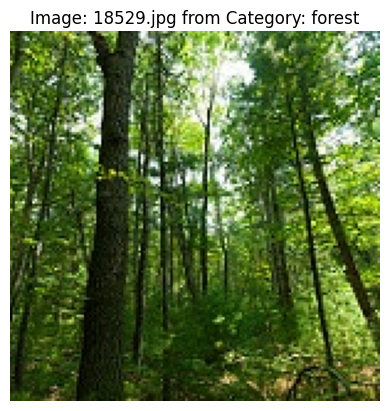

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Use the path obtained from kagglehub
dataset_path = path  # Update with your actual path

# Choose the 'seg_train' category
category = 'seg_train'
category_path = os.path.join(dataset_path, category, category)  # Navigate to the nested 'seg_train' directory

# List the subdirectories (categories)
subdirs = os.listdir(category_path)

# Ensure there are subdirectories to choose from
if not subdirs:
    print("No subdirectories found in the category.")
else:
    # Randomly select a category (subdirectory)
    selected_subdir = random.choice(subdirs)
    selected_path = os.path.join(category_path, selected_subdir)

    # List image files in the selected category
    image_files = [f for f in os.listdir(selected_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Ensure there are image files to choose from
    if not image_files:
        print(f"No image files found in category: {selected_subdir}.")
    else:
        # Randomly select an image file
        random_image = random.choice(image_files)
        image_to_load = os.path.join(selected_path, random_image)

        # Load and display the image
        image = Image.open(image_to_load)

        plt.imshow(image)
        plt.title(f"Image: {random_image} from Category: {selected_subdir}")
        plt.axis('off')
        plt.show()


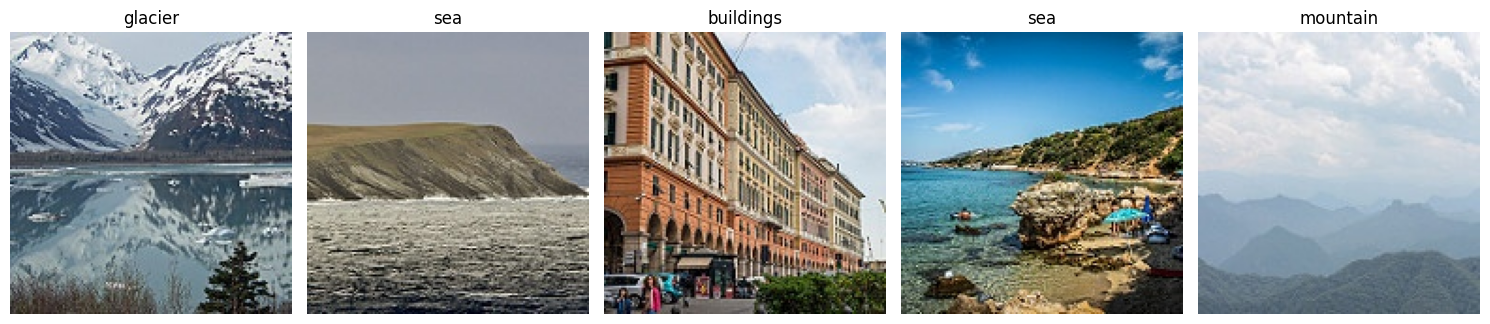

In [ ]:
# Set the number of samples to visualize
num_samples = 5

# Create a figure for visualization
plt.figure(figsize=(15, 10))

for i in range(num_samples):
    # Randomly select a category (subdirectory)
    selected_subdir = random.choice(subdirs)
    selected_path = os.path.join(category_path, selected_subdir)

    # List image files in the selected category
    image_files = [f for f in os.listdir(selected_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Randomly select an image file
    random_image = random.choice(image_files)
    image_to_load = os.path.join(selected_path, random_image)

    # Load the image
    image = Image.open(image_to_load)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image)
    plt.title(selected_subdir)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1st Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# 2nd Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# 3rd Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # 6 classes in the dataset

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_dir = os.path.join(path, 'seg_test', 'seg_test')

# Data Augmentation for training
train_datagen = ImageDataGenerator(rescale=1.0/255,           # Normalize pixel values
    validation_split=0.2,      # Use 20% of the training data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and test data
# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),    # Resize images
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(train_dir,
                                                  target_size=(150, 150),
                                                  batch_size=128,
                                                  class_mode='categorical')


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 119s 300ms/step - accuracy: 0.3294 - loss: 3.6967 - val_accuracy: 0.2115 - val_loss: 2.5057
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 125s 276ms/step - accuracy: 0.4195 - loss: 1.3970 - val_accuracy: 0.4800 - val_loss: 1.3121
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 140s 271ms/step - accuracy: 0.4099 - loss: 1.3908 - val_accuracy: 0.4768 - val_loss: 1.6949
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 98s 276ms/step - accuracy: 0.4388 - loss: 1.3378 - val_accuracy: 0.5439 - val_loss: 1.1549
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 142s 275ms/step - accuracy: 0.4467 - loss: 1.3098 - val_accuracy: 0.6031 - val_loss: 1.0156
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 97s 273ms/step - accuracy: 0.4802 - loss: 1.2227 - val_accuracy: 0.3959 - val_loss: 1.5310
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 99s 280ms/step - accuracy: 0.4727 - loss: 1.2462 - val_accuracy: 0.3802 - val_loss: 3.8879
Epoch 8/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 98s 275ms/step - accuracy: 0.4943 - loss: 1.2407 -

110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - accuracy: 0.6955 - loss: 0.8738
Test Accuracy: 69.79%


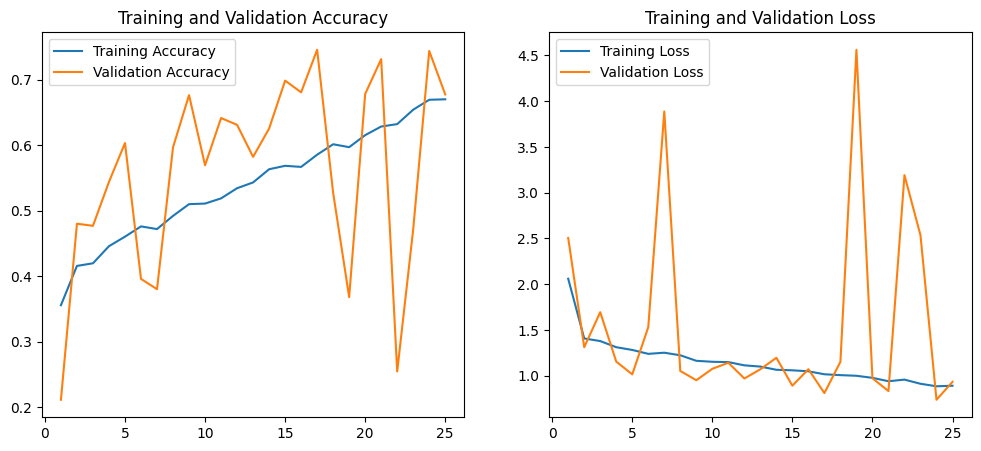

In [ ]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy and loss curves
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step


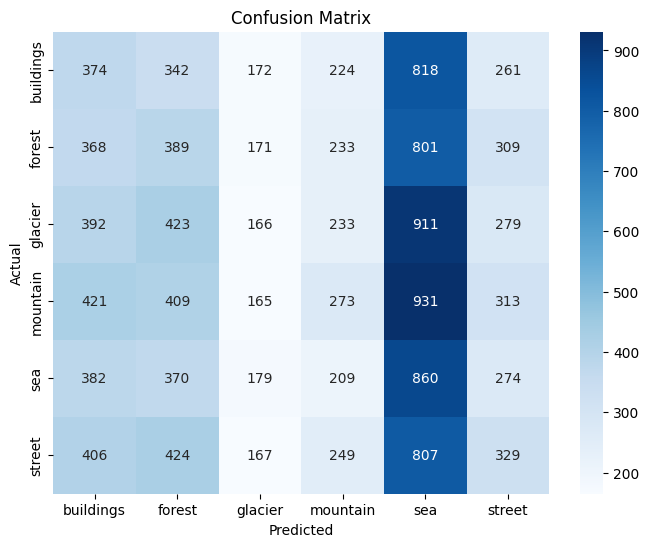

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the classes for test data
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
